# Numerical operation - Custom function

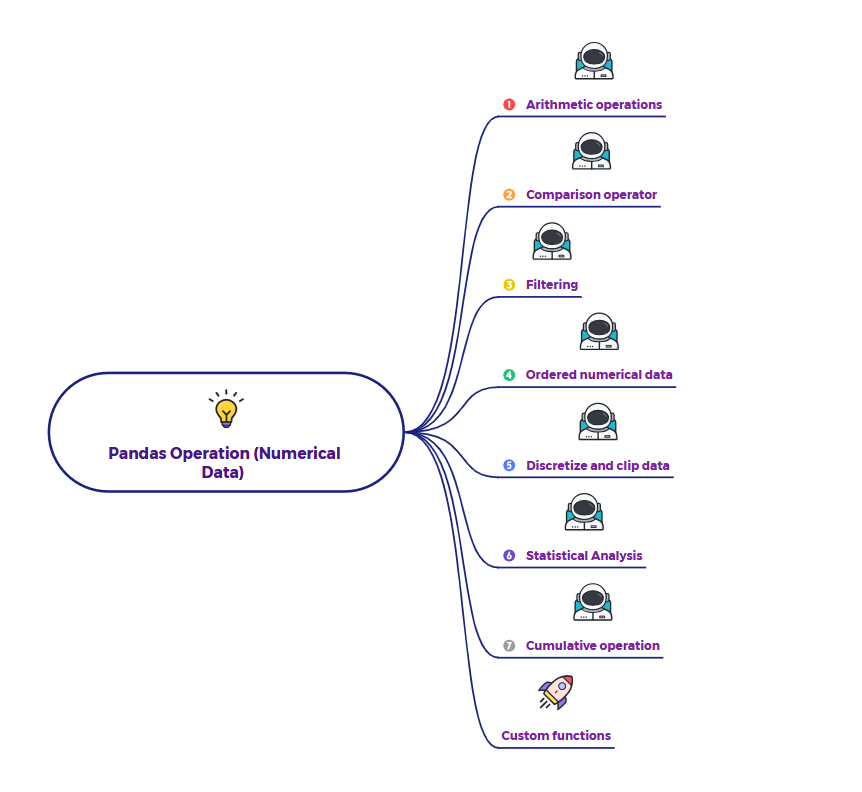

# Notebook Walkthrough -

* Custom function
* Apply Custom function - apply()
* Apply Custom function - applymap()
* Apply Custom function - map()
* Apply Custom function - lambda function

# 1. Custom function

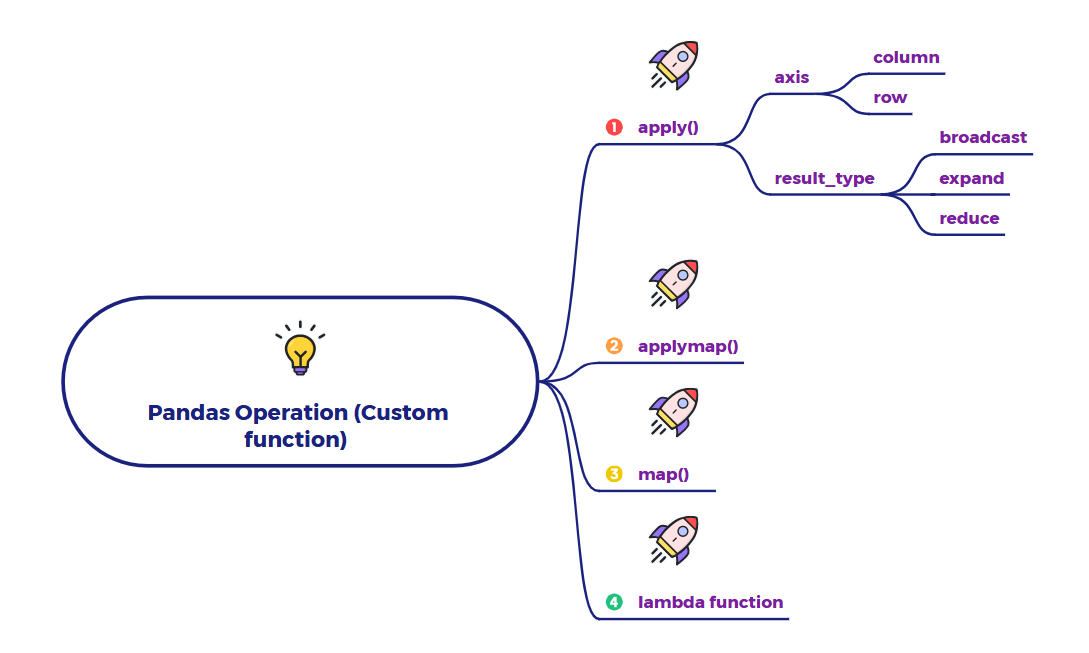

# Custom function summary

* apply(): This is a versatile method for applying a function along either the rows or columns of a DataFrame.
   * axis: Specifies whether the function operates on columns (axis=0) or rows (axis=1).
   * result_type: Dictates the shape of the output DataFrame or Series based on what the applied function returns.
      * reduce (default): Aggregates the input (row or column) into a single scalar value, resulting in a Series.
      * expand: If the function returns multiple values (e.g., a Series), these are expanded into new columns (for row-wise) or new rows (for column-wise) in a new DataFrame.
      * broadcast: If the function returns a Series of the same shape as the input Series, the results are broadcast back to form a new DataFrame of the same original shape.
* applymap(): This method applies a function element-wise to every single cell (value) in a DataFrame. It's used for cell-by-cell transformations.
* map(): This method is specifically used to apply a function element-wise to each value within a single Pandas Series (i.e., a column). It's highly optimized for value-to-value mappings.
* lambda function: These are small, anonymous (unnamed) inline functions in Python that are often used in conjunction with apply(), applymap(), or map() when the custom logic is simple and can be expressed in a single line. They allow for concise code without needing to define a full function using def.

# 2. Apply Custom function - apply()

### A. Create the sample dataset

In [125]:
# --- Create a custom sample DataFrame ---
# This DataFrame represents sales data for different product categories
# across various months, including some missing values (NaN) for robustness.

import pandas as pd
import numpy as np

data = {
    'Electronics': [1500, 1800, np.nan, 2200, 1900],
    'Apparel': [800, 950, 700, 1000, np.nan],
    'HomeGoods': [1200, 1100, 1300, np.nan, 1400],
    'Books': [300, 400, 350, 420, 380]
}
df_sales = pd.DataFrame(data, index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])

In [126]:
df_sales

,Electronics,Apparel,HomeGoods,Books
Jan,1500.0,800.0,1200.0,300
Feb,1800.0,950.0,1100.0,400
Mar,NaN,700.0,1300.0,350
Apr,2200.0,1000.0,NaN,420
May,1900.0,NaN,1400.0,380


### B. Define the utility function

In [127]:
# Function to calculate range (max - min)

def calculate_range(series):
    """Calculates the range (max - min) of a Series, ignoring NaNs."""
    return series.max() - series.min()

In [128]:
# Function to categorize sum (returns multiple values)
def categorize_sum(series):
    """Categorizes the sum of a Series into 'Low', 'Medium', 'High'."""
    total_sum = series.sum()
    if total_sum < 3000:
        return 'Low'
    elif total_sum < 6000:
        return 'Medium'
    else:
        return 'High'

In [129]:

# Define the get_stats function to return a Series with 'Mean' ,  'Sum' , min , max , std , count ....
def get_stats(x):
  """Calculates the mean and sum of a pandas Series."""
  return pd.Series({
      'Mean': x.mean(),
      'Sum': x.sum(),
      'Min': x.min(),
      'Max': x.max(),
      'Std': x.std(),
      'Count': x.count(),
      'Median': x.median(),
      'Var': x.var(),
      'Skewness': x.skew(),
      'Kurtosis': x.kurtosis(),
      'Quantile_25': x.quantile(0.25),
      'Quantile_50': x.quantile(0.5),
      'Quantile_75': x.quantile(0.75),
  })

In [130]:
# Function that returns a Series with same length as input (for result_type='broadcast')
def normalize_and_flag_high(series):
    """
    Normalizes the series by its mean and flags values > 1.2 * mean.
    Returns a Series of 'Normalized_Value' and a 'Is_High' boolean.
    """
    mean_val = series.mean()
    if mean_val == 0: # Avoid division by zero
        return pd.Series(0, index=series.index), pd.Series(False, index=series.index)

    normalized = series / mean_val
    is_high = series > (1.2 * mean_val)
    return pd.Series(normalized, index=series.index), pd.Series(is_high, index=series.index)

In [131]:
def normalize_series(series):
    """Normalizes a Series by its mean."""
    mean_val = series.mean()
    return series / mean_val if mean_val != 0 else pd.Series(0, index=series.index)

### C. Apply function column wise ( axis = 0 )

In [132]:
# axis=0 (default): Apply function column-wise
# sales range by different categories

sales_range_by_category = df_sales.apply(calculate_range, axis=0)
sales_range_by_category

,0
Electronics,700.0
Apparel,300.0
HomeGoods,300.0
Books,120.0


In [133]:
# axis=0 (default): Apply function column-wise
# categorize sum of categorize into low , medium and high

sum_by_category = df_sales.apply(categorize_sum, axis=0)
sum_by_category

,0
Electronics,High
Apparel,Medium
HomeGoods,Medium
Books,Low


### D. Apply function row wise ( axis = 1 )

In [134]:
# axis=1: Apply function row-wise
# sales range by month across categories

sales_range_by_month = df_sales.apply(calculate_range, axis=1)
sales_range_by_month

,0
Jan,1200.0
Feb,1400.0
Mar,950.0
Apr,1780.0
May,1520.0


In [135]:
# axis=1 : Apply function row-wise
# categorize sum of categorize into low , medium and high

sales_categorized_by_month = df_sales.apply(categorize_sum , axis=1)
sales_categorized_by_month

,0
Jan,Medium
Feb,Medium
Mar,Low
Apr,Medium
May,Medium


### E. Result type = 'reduce'

When result_type is set to 'reduce' (which is the default), df.apply() expects the applied function to aggregate the input Series (either a row or a column) into a single scalar value. Pandas then collects these individual scalar results, effectively "reducing" the dimensionality of the output, to form a new Pandas Series. This is suitable for aggregations like calculating the sum, mean, count, or a custom range for each row or column.

In [136]:
#  result_type variations

# result_type='reduce' (default): Returns a Series if the function returns a scalar.

sales_range_reduced = df_sales.apply(calculate_range, axis=0, result_type='reduce')
sales_range_reduced

,0
Electronics,700.0
Apparel,300.0
HomeGoods,300.0
Books,120.0


In [137]:
#  result_type variations

# result_type='reduce' (default): Returns a Series if the function returns a scalar.

sales_range_reduced_row = df_sales.apply(calculate_range, axis=1, result_type='reduce')
sales_range_reduced_row

,0
Jan,1200.0
Feb,1400.0
Mar,950.0
Apr,1780.0
May,1520.0


### F. Result type = 'expand'

Using result_type='expand' tells df.apply() that the function applied to each row or column will return multiple scalar values, typically packed into a list, tuple, or a Pandas Series. Pandas then "expands" these multiple return values into distinct new columns (if axis=1) or new rows (if axis=0) in a new DataFrame. This is ideal for functions that calculate several related metrics from a single row/column and you want each metric to be its own new column.

In [138]:
# result_type='expand': Returns a DataFrame.
# The applied function must return a Series (or list-like) where each element
# becomes a new column (if axis=0) or a new row (if axis=1).

# Applying get_stats column-wise will create a DataFrame where rows are 'Mean' and 'Sum'
sales_stats_expanded_cols = df_sales.apply(get_stats, axis=0, result_type='expand')
sales_stats_expanded_cols

,Electronics,Apparel,HomeGoods,Books
Mean,1850.000000,862.500000,1250.000000,370.000000
Sum,7400.000000,3450.000000,5000.000000,1850.000000
Min,1500.000000,700.000000,1100.000000,300.000000
Max,2200.000000,1000.000000,1400.000000,420.000000
Std,288.675135,137.689264,129.099445,46.904158
Count,4.000000,4.000000,4.000000,5.000000
Median,1850.000000,875.000000,1250.000000,380.000000
Var,83333.333333,18958.333333,16666.666667,2200.000000
Skewness,0.000000,-0.323231,0.000000,-0.799503
Kurtosis,0.912000,-3.032967,-1.200000,0.068182


### G. result_type = 'broadcast'

With result_type='broadcast', df.apply() expects the function to return a Series of the same length and with the same index as the Series it received as input (a row or a column). Pandas then "broadcasts" these transformed Series back to form a new DataFrame that has the exact same shape (same number of rows and columns) as the original DataFrame. This is useful for element-wise transformations or normalizations applied across an entire row or column while preserving the original structure.

In [140]:
# result_type='broadcast': Returns a DataFrame with the same shape as the original.
# The applied function must return a Series with the same index/columns as the input Series.
# When apply with broadcast, it's generally expected the function returns a single Series
# that is broadcastable. If it returns multiple, it might behave differently or raise error
# based on context. For a simpler broadcast demo, let's just return one Series.

# Apply normalize_series column-wise to broadcast back to the original shape
df_normalized_sales = df_sales.apply(normalize_series, axis=0, result_type='broadcast')
df_normalized_sales

,Electronics,Apparel,HomeGoods,Books
Jan,0.810811,0.927536,0.96,0.810811
Feb,0.972973,1.101449,0.88,1.081081
Mar,NaN,0.811594,1.04,0.945946
Apr,1.189189,1.159420,NaN,1.135135
May,1.027027,NaN,1.12,1.027027


In [141]:
# Apply normalize_series row-wise to broadcast back to the original shape
df_normalized_sales_row = df_sales.apply(normalize_series, axis=1, result_type='broadcast')
df_normalized_sales_row

,Electronics,Apparel,HomeGoods,Books
Jan,1.578947,0.842105,1.263158,0.315789
Feb,1.694118,0.894118,1.035294,0.376471
Mar,NaN,0.893617,1.659574,0.446809
Apr,1.823204,0.828729,NaN,0.348066
May,1.548913,NaN,1.141304,0.309783


# 3. Apply Custom function - applymap()

### A. Create the sample dataset

In [142]:
import pandas as pd
import numpy as np

# --- Create a custom sample DataFrame ---
# This DataFrame represents hypothetical scores or values for various subjects/metrics,
# suitable for element-wise operations with applymap().
data = {
    'Math_Score': [85.5, 92.1, 78.9, 95.0, 88.3, np.nan, 70.2],
    'Physics_Score': [70.3, 88.7, 95.2, 75.8, np.nan, 80.1, 72.5],
    'Chemistry_Score': [90.8, 85.0, 70.1, np.nan, 92.5, 78.4, 83.9],
    'Biology_Score': [75.0, np.nan, 88.2, 91.5, 80.0, 76.8, 82.3]
}
df_scores = pd.DataFrame(data, index=['Student A', 'Student B', 'Student C',
                                      'Student D', 'Student E', 'Student F', 'Student G'])

In [143]:
df_scores

,Math_Score,Physics_Score,Chemistry_Score,Biology_Score
Student A,85.5,70.3,90.8,75.0
Student B,92.1,88.7,85.0,NaN
Student C,78.9,95.2,70.1,88.2
Student D,95.0,75.8,NaN,91.5
Student E,88.3,NaN,92.5,80.0
Student F,NaN,80.1,78.4,76.8
Student G,70.2,72.5,83.9,82.3


### B. Define the Utility functions

In [144]:
# Function to round each score to the nearest integer

def round_score(score):
    """Rounds a numerical score to the nearest integer, handling NaNs."""
    if pd.isna(score):
        return np.nan
    return round(score)

In [145]:
# Function to convert score to a percentage string

def score_to_percentage(score):
    """Converts a numerical score to a formatted percentage string."""
    if pd.isna(score):
        return np.nan # Or any other representation for missing data
    return f"{score:.1f}%"

In [146]:
# Function to categorize each individual score as 'Pass' or 'Fail'

def pass_fail_threshold(score, threshold=75.0):
    """Categorizes a score as 'Pass' or 'Fail' based on a threshold."""
    if pd.isna(score):
        return np.nan
    return 'Pass' if score >= threshold else 'Fail'

### C. applymap - Applying round_score() to round all scores

In [147]:
# Applying round_score() to round all scores

df_rounded_scores = df_scores.applymap(round_score)
df_rounded_scores

,Math_Score,Physics_Score,Chemistry_Score,Biology_Score
Student A,86.0,70.0,91.0,75.0
Student B,92.0,89.0,85.0,NaN
Student C,79.0,95.0,70.0,88.0
Student D,95.0,76.0,NaN,92.0
Student E,88.0,NaN,92.0,80.0
Student F,NaN,80.0,78.0,77.0
Student G,70.0,72.0,84.0,82.0


### D. applymap() - Applying score_to_percentage() to format all scores as percentages

In [148]:
# Applying score_to_percentage() to format all scores as percentages

df_percentage_score = df_scores.applymap(score_to_percentage)
df_percentage_score

,Math_Score,Physics_Score,Chemistry_Score,Biology_Score
Student A,85.5%,70.3%,90.8%,75.0%
Student B,92.1%,88.7%,85.0%,NaN
Student C,78.9%,95.2%,70.1%,88.2%
Student D,95.0%,75.8%,NaN,91.5%
Student E,88.3%,NaN,92.5%,80.0%
Student F,NaN,80.1%,78.4%,76.8%
Student G,70.2%,72.5%,83.9%,82.3%


### E. applymap() - Applying pass_fail_threshold() to categorize each score individually (threshold=75.0)

In [149]:
# Applying pass_fail_threshold() to categorize each score individually (threshold=75.0)

df_pass_fail = df_scores.applymap(pass_fail_threshold)
df_pass_fail

,Math_Score,Physics_Score,Chemistry_Score,Biology_Score
Student A,Pass,Fail,Pass,Pass
Student B,Pass,Pass,Pass,NaN
Student C,Pass,Pass,Fail,Pass
Student D,Pass,Pass,NaN,Pass
Student E,Pass,NaN,Pass,Pass
Student F,NaN,Pass,Pass,Pass
Student G,Fail,Fail,Pass,Pass


# 4. Apply Custom function - map()

### A. Create the dataset

In [150]:
import pandas as pd
import numpy as np

# --- Create a custom sample DataFrame ---
# This DataFrame simulates sales data for different items, including quantities and unit prices.
# It's suitable for demonstrating element-wise transformations on a single Series (column).
data = {
    'Item_ID': ['A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107'],
    'Quantity_Sold': [10, 15, 8, 20, 12, 5, 18],
    'Unit_Price_USD': [25.50, 10.00, 50.75, 12.25, 30.00, 100.00, 8.50],
    'Discount_Rate': [0.05, 0.10, 0.0, 0.08, 0.05, 0.15, 0.0] # Some items have no discount
}
df_sales = pd.DataFrame(data)

In [151]:
df_sales

,Item_ID,Quantity_Sold,Unit_Price_USD,Discount_Rate
0,A101,10,25.50,0.05
1,A102,15,10.00,0.10
2,A103,8,50.75,0.00
3,A104,20,12.25,0.08
4,A105,12,30.00,0.05
5,A106,5,100.00,0.15
6,A107,18,8.50,0.00


### B. Define the utility function

In [152]:
# Function to calculate final price after discount for a single unit price

def calculate_net_price(price, discount_rate):
    """Calculates the net price after applying a discount."""
    return price * (1 - discount_rate)

# Function to categorize unit price into 'Low', 'Medium', 'High'
def categorize_price(price):
    """Categorizes a unit price based on predefined thresholds."""
    if price < 20:
        return 'Low'
    elif price < 60:
        return 'Medium'
    else:
        return 'High'

In [153]:
# Function to apply a markup based on the original value

def apply_markup(price):
    """Applies a markup to a price based on its value."""
    if price > 50:
        return price * 1.10  # 10% markup for high-priced items
    else:
        return price * 1.05  # 5% markup for low-priced items


In [154]:
# Function if  we want to convert quantities to 'dozen' units.

def to_dozen(quantity):
    return quantity / 12

### C. map() - Applying a simple function to 'Quantity_Sold'

In [155]:
df_sales['Quantity_in_Dozens'] = df_sales['Quantity_Sold'].map(to_dozen)
df_sales

,Item_ID,Quantity_Sold,Unit_Price_USD,Discount_Rate,Quantity_in_Dozens
0,A101,10,25.50,0.05,0.833333
1,A102,15,10.00,0.10,1.250000
2,A103,8,50.75,0.00,0.666667
3,A104,20,12.25,0.08,1.666667
4,A105,12,30.00,0.05,1.000000
5,A106,5,100.00,0.15,0.416667
6,A107,18,8.50,0.00,1.500000


### D. map() - Applying a more complex categorization function to 'Unit_Price_USD'

In [156]:
df_sales['Price_Category'] = df_sales['Unit_Price_USD'].map(categorize_price)
df_sales

,Item_ID,Quantity_Sold,Unit_Price_USD,Discount_Rate,Quantity_in_Dozens,Price_Category
0,A101,10,25.50,0.05,0.833333,Medium
1,A102,15,10.00,0.10,1.250000,Low
2,A103,8,50.75,0.00,0.666667,Medium
3,A104,20,12.25,0.08,1.666667,Low
4,A105,12,30.00,0.05,1.000000,Medium
5,A106,5,100.00,0.15,0.416667,High
6,A107,18,8.50,0.00,1.500000,Low


### E. map() - Applying apply_markup() to 'Unit_Price_USD'

In [157]:
df_sales['Unit_Price_with_Markup'] = df_sales['Unit_Price_USD'].map(apply_markup)
df_sales

,Item_ID,Quantity_Sold,Unit_Price_USD,Discount_Rate,Quantity_in_Dozens,Price_Category,Unit_Price_with_Markup
0,A101,10,25.50,0.05,0.833333,Medium,26.7750
1,A102,15,10.00,0.10,1.250000,Low,10.5000
2,A103,8,50.75,0.00,0.666667,Medium,55.8250
3,A104,20,12.25,0.08,1.666667,Low,12.8625
4,A105,12,30.00,0.05,1.000000,Medium,31.5000
5,A106,5,100.00,0.15,0.416667,High,110.0000
6,A107,18,8.50,0.00,1.500000,Low,8.9250


# 5. Apply Custom function - lambda function

### A. Create sample dataset

In [158]:
# --- Create a custom sample DataFrame ---
# This DataFrame simulates quarterly performance metrics for different regions,
# including some missing values (NaN) to show robustness.
data = {
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4'],
    'Region': ['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West'],
    'Sales_Revenue': [150000, 180000, 165000, 200000, 120000, np.nan, 140000, 170000],
    'Marketing_Spend': [15000, 18000, 17000, 21000, 12000, 13000, 14500, 18000],
    'Profit_Margin_Pct': [0.15, 0.18, 0.16, 0.20, 0.12, 0.10, 0.14, 0.17]
}
df_performance = pd.DataFrame(data)

In [159]:
df_performance

,Quarter,Region,Sales_Revenue,Marketing_Spend,Profit_Margin_Pct
0,Q1,East,150000.0,15000,0.15
1,Q2,East,180000.0,18000,0.18
2,Q3,East,165000.0,17000,0.16
3,Q4,East,200000.0,21000,0.20
4,Q1,West,120000.0,12000,0.12
5,Q2,West,NaN,13000,0.10
6,Q3,West,140000.0,14500,0.14
7,Q4,West,170000.0,18000,0.17


### B. Applying a simple lambda function to a single column

In [160]:
# Convert 'Sales_Revenue' from USD to a custom currency (e.g., divide by 1000 for 'K USD')

df_performance['Sales_K_USD'] = df_performance['Sales_Revenue'].apply(lambda x: x / 1000 if pd.notna(x) else x)
df_performance

,Quarter,Region,Sales_Revenue,Marketing_Spend,Profit_Margin_Pct,Sales_K_USD
0,Q1,East,150000.0,15000,0.15,150.0
1,Q2,East,180000.0,18000,0.18,180.0
2,Q3,East,165000.0,17000,0.16,165.0
3,Q4,East,200000.0,21000,0.20,200.0
4,Q1,West,120000.0,12000,0.12,120.0
5,Q2,West,NaN,13000,0.10,NaN
6,Q3,West,140000.0,14500,0.14,140.0
7,Q4,West,170000.0,18000,0.17,170.0


### C. Applying a lambda function with a conditional logic

In [161]:
# Categorize 'Profit_Margin_Pct' into 'High' or 'Low'
df_performance['Profit_Category'] = df_performance['Profit_Margin_Pct'].apply(
    lambda x: 'High Profit' if x > 0.15 else ('Low Profit' if pd.notna(x) else np.nan)
)
df_performance

,Quarter,Region,Sales_Revenue,Marketing_Spend,Profit_Margin_Pct,Sales_K_USD,Profit_Category
0,Q1,East,150000.0,15000,0.15,150.0,Low Profit
1,Q2,East,180000.0,18000,0.18,180.0,High Profit
2,Q3,East,165000.0,17000,0.16,165.0,High Profit
3,Q4,East,200000.0,21000,0.20,200.0,High Profit
4,Q1,West,120000.0,12000,0.12,120.0,Low Profit
5,Q2,West,NaN,13000,0.10,NaN,Low Profit
6,Q3,West,140000.0,14500,0.14,140.0,Low Profit
7,Q4,West,170000.0,18000,0.17,170.0,High Profit


### D. Applying a lambda function across rows (axis=1)

In [162]:
# Calculate 'Return_on_Marketing_Spend' for each row.
# This requires accessing multiple columns within the lambda.
df_performance['ROM_Ratio'] = df_performance.apply(
    lambda row: (row['Sales_Revenue'] - row['Marketing_Spend']) / row['Marketing_Spend']
    if row['Marketing_Spend'] > 0 and pd.notna(row['Sales_Revenue'])
    else np.nan,
    axis=1
)
df_performance

,Quarter,Region,Sales_Revenue,Marketing_Spend,Profit_Margin_Pct,Sales_K_USD,Profit_Category,ROM_Ratio
0,Q1,East,150000.0,15000,0.15,150.0,Low Profit,9.000000
1,Q2,East,180000.0,18000,0.18,180.0,High Profit,9.000000
2,Q3,East,165000.0,17000,0.16,165.0,High Profit,8.705882
3,Q4,East,200000.0,21000,0.20,200.0,High Profit,8.523810
4,Q1,West,120000.0,12000,0.12,120.0,Low Profit,9.000000
5,Q2,West,NaN,13000,0.10,NaN,Low Profit,NaN
6,Q3,West,140000.0,14500,0.14,140.0,Low Profit,8.655172
7,Q4,West,170000.0,18000,0.17,170.0,High Profit,8.444444


### E. Applying a lambda function with grouping

In [163]:
# Calculate the percentage of total sales within each region for each entry.
# This requires a two-step process: first sum by group, then apply lambda for percentage.

total_sales_by_region = df_performance.groupby('Region')['Sales_Revenue'].transform('sum')

df_performance['Sales_Share_of_Region'] = df_performance.apply(
    lambda row: row['Sales_Revenue'] / total_sales_by_region[row.name]
    if pd.notna(row['Sales_Revenue']) and total_sales_by_region[row.name] > 0
    else np.nan,
    axis=1
)

df_performance

,Quarter,Region,Sales_Revenue,Marketing_Spend,Profit_Margin_Pct,Sales_K_USD,Profit_Category,ROM_Ratio,Sales_Share_of_Region
0,Q1,East,150000.0,15000,0.15,150.0,Low Profit,9.000000,0.215827
1,Q2,East,180000.0,18000,0.18,180.0,High Profit,9.000000,0.258993
2,Q3,East,165000.0,17000,0.16,165.0,High Profit,8.705882,0.237410
3,Q4,East,200000.0,21000,0.20,200.0,High Profit,8.523810,0.287770
4,Q1,West,120000.0,12000,0.12,120.0,Low Profit,9.000000,0.279070
5,Q2,West,NaN,13000,0.10,NaN,Low Profit,NaN,NaN
6,Q3,West,140000.0,14500,0.14,140.0,Low Profit,8.655172,0.325581
7,Q4,West,170000.0,18000,0.17,170.0,High Profit,8.444444,0.395349


# Custom Function Application Strategy

Developing a strategy for using apply(), applymap(), and map() (often with lambda functions) in Pandas boils down to understanding the granularity of the operation you want to perform and the expected output shape.

Here's a strategy:

Strategy for Custom Function Usage in Pandas

1. General Principle:

Always prefer vectorized (built-in Pandas/NumPy) operations first, as they are almost always faster. Use apply(), applymap(), and map() when vectorized solutions are not possible due to complex custom logic.

2. Decision Flow:

A. Are you transforming/operating on individual elements within a single Series (column)?

Use Series.map()

* When: You have a custom function or a dictionary that maps each value in one specific column to a new value. This is typically the most performant choice for single-column element-wise operations.
* Example: df['Income'].map({'<=50K': 0, '>50K': 1})
* Example: df['Age_Category'] = df['Age'].map(lambda x: 'Adult' if x >= 18 else 'Minor')

B. Are you transforming/operating on individual elements across the entire DataFrame (or a subset of columns/rows element-wise)?

Use df.applymap()

* When: You need to apply a scalar-to-scalar function to every cell in your DataFrame.
* Example: df.applymap(lambda x: round(x, 2)) (to round all numerical cells)
* Example: df[['num_col1', 'num_col2']].applymap(lambda x: np.log(x) if x > 0 else np.nan)

C. Are you transforming/operating on entire rows or entire columns of a DataFrame?

Use df.apply()

* When: Your custom function needs to take a whole Series (a row or a column) as input to perform its calculation. This is the most flexible of the three for more complex, multi-element logic.

Sub-Strategy for df.apply():

If your function processes a row/column and returns a single value (scalar):

* Choose axis=0 (column-wise) or axis=1 (row-wise).
* result_type='reduce' (Default): This is what you want. Pandas will consolidate the scalar results into a new Series.
* Example (axis=0): Calculating the range (max-min) for each column: df.  
  select_dtypes(include='number').apply(lambda col: col.max() - col.min(), axis=0)
* Example (axis=1): Calculating net capital for each row: df.apply(lambda row: row['Capital Gain'] - row['Capital Loss'], axis=1)

If your function processes a row/column and returns multiple, distinct values that you want as NEW columns (if row-wise) or NEW rows (if column-wise):

* Choose axis=0 (column-wise) or axis=1 (row-wise).
* result_type='expand': This will expand the returned Series/list/tuple into new columns/rows.
* Example (axis=1): Calculating min and max of two columns per row: df.apply(lambda row: pd.Series({'min_val': min(row['Age'], row['Hours per week']), 'max_val': max(row['Age'], row['Hours per week'])}), axis=1, result_type='expand')

If your function processes a row/column and returns a Series of the same length and index as the input Series (i.e., it transforms each element but keeps the structure):

* Choose axis=0 (column-wise) or axis=1 (row-wise).
* result_type='broadcast': This will apply the transformation and return a DataFrame of the exact same shape as the input.
* Example (axis=0): Z-score standardization of each numerical column (broadcasting back to the original shape): df.select_dtypes(include='number').apply(lambda col: (col - col.mean()) / col.std(), axis=0, result_type='broadcast')
* Example (axis=1): Normalizing values within each row: df[['Capital Gain', 'Capital Loss']].apply(lambda row: row / row.sum() if row.sum() != 0 else row, axis=1, result_type='broadcast')

D. When to use lambda functions:

* As a companion to apply(), applymap(), or map(): Use lambda functions when the custom logic is simple, fits on a single line, and doesn't need to be defined formally for reuse elsewhere. They make the code concise.
* Avoid complex lambdas: If your logic inside the lambda becomes too long, complex, or involves multiple statements, it's better to define a regular Python function using def for clarity and maintainability.

By following this strategy, you can efficiently choose the most appropriate Pandas function for your custom data manipulation tasks.

# COMPLETED